In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Say that I run exactly a mile every single day and record the time. Unfortunately I"m not getting exactly better at it over time, though there is noise in my performance. In fact, my mile time follows a normal distribution with a mean of seven minutes (for ease we'll say 420 seconds) and a standard deviation of fifteen seconds.

Unfortunately my phone gets hacked, and there's a chance that someone has gone in and modified my historical run times. How will I know which times are mine, and which may be compromised?

1) Create a PDF graph of this distribution with the proper labels on the axes.

Text(0.5, 0.92, 'Distribution of Mile Run Times')

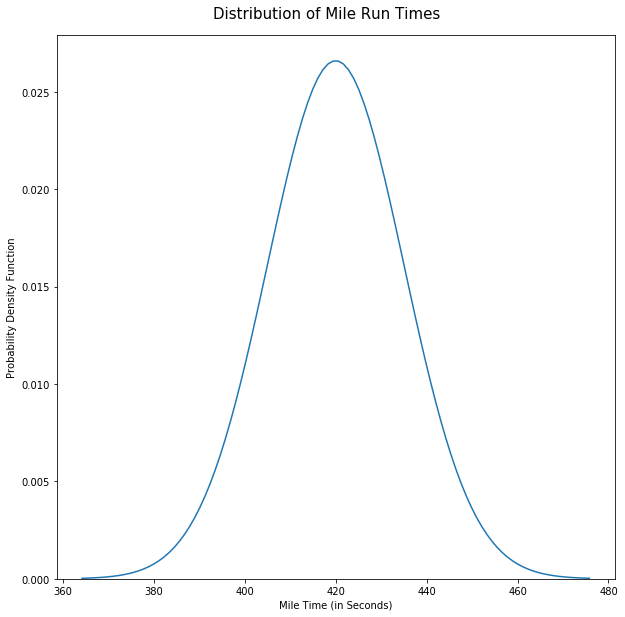

In [2]:
fig = plt.figure(figsize=(10,10))
dist = stats.norm(loc=420, scale=15)
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.ylim(bottom=0)
plt.xlabel('Mile Time (in Seconds)')
plt.ylabel('Probability Density Function')
fig.suptitle('Distribution of Mile Run Times', fontsize=15, y=0.92)

2) Say we wanted to create a rejection region for any mile times that look suspicious. If we set the rejection region with a p-value of 0.05 in a two-sided test, what values would constitute the cutoffs?

In [3]:
#Two-Sided Test, p-value 0.05
print('Rejection Region: less than', dist.ppf(0.025))
print('Rejection Region: greater than', dist.ppf(0.975))

Rejection Region: less than 390.6005402318992
Rejection Region: greater than 449.3994597681008


3) Say now that I'm only concerned about looking too slow, meaning I'm only concerned about outliers at the lower end. If we set the rejection region with a p-value of 0.05, what value would constitute the cutoff?

In [4]:
#One-Sided Test, p-value 0.05
print('Rejection Region: less than', dist.ppf(0.05))

Rejection Region: less than 395.3271955957279


4) If I see a run-time of 396 seconds, what p-value would this value get in a one-sided test? Can we reject the null hypothesis at a significance level of 0.05? What p-value would it get in a two-sided test? Can we reject the null hypothesis at a significance level of 0.05?

In [5]:
#One-Sided Test - P-Value
dist.cdf(396)

0.054799291699557974

In [6]:
#One-Sided Test, p-value 0.05
print('Rejection Region: less than', dist.ppf(0.05))

Rejection Region: less than 395.3271955957279


We do not reject the null hypothesis here, as our result has a p-value higher than 0.05, and his higher than the cutoff level for the rejection region.

5) Now I want to look at the mean of twenty random samples from this distribution to see if this is different than what I would expect. What would the mean and standard deviation of this new distribution (of the mean of twenty samples taken from the underlying distribution) be?

In [7]:
dist = stats.norm(loc=420, scale=15/np.sqrt(20))

In [8]:
#Mean
dist.mean()

420.0

In [9]:
#STD
dist.std()

3.3541019662496843

6) Again, I'm only concerned about looking too slow. What is the rejection region of the mean of twenty random samples taken from the distribution at a signifiance level of 0.01?

In [10]:
dist.ppf(0.01)

412.19719202149884

7) Say that I'm unsure of my original standard deviation estimation, especially because the data may have been tampered. I want to use my twenty random samples below to estimate the standard deviation of the underlying distribution. First, what would the mean and standard deviation of this new distribution (of the mean of twenty samples taken from the underlying distribution given our new standard deviation) be?

In [11]:
values =  [417.95,
           380.87,
           424.89,
           404.97,
           381.5,
           416.86,
           409.4,
           429.15,
           436.96,
           437.95,
           392.05,
           426.85,
           415.48,
           428.43,
           424.53,
           415.31,
           415.37,
           422.77,
           425.23]

In [12]:
dist = stats.t(loc=420, scale=np.std(values, ddof=1)/np.sqrt(20), df=19)

In [13]:
dist.mean()

420.0

In [14]:
dist.std()

3.867390335424643

8) Again, I'm only concerned about looking too slow. What is the rejection region of the mean of twenty random samples taken from the distribution at a signifiance level of 0.01?

In [15]:
dist.ppf(0.01)

410.71010061634036

9) What is the p-value of the mean of our samples (one-sided test)? Can we reject the null hypothesis that these samples could been taken from the original distribution?

In [16]:
#P-Value
dist.cdf(np.mean(values))

0.15184268937111522

BONUS: 10) Say that the probability of me coming to class on time is 30%. If I come into class fifteen times in the semester, you could say that the distribution of me coming into class on time throughout the semester fits a binomial distribution with a probability of 0.3 and fifteen independent trials.

Using the normal approxmation, say you wanted to calculate the probability that I've been replaced with a body double throughout the semester. At a signifiance level of 0.05 in a two-sided test, what would the rejection regions be that it wasn't actually me coming to class anymore? Or, to put it another way, how little and many times would I have to come to class on time for it to be actually suspicious? Be sure to keep the continuity correction in mind.

In [17]:
binomial_dist = stats.binom(n=15, p=0.3)

In [18]:
dist = stats.norm(binomial_dist.mean(), binomial_dist.std())

In [19]:
dist.ppf(0.025)

1.0214090086377645

In [20]:
dist.ppf(0.975)

7.978590991362235

Now, keep in mind that the normal approximation uses the **continuity correction**, meaning that 1 'success' (or less) is actually measured at 1.5, and 8 'successes' (or more), is actually measured at 7.5. That means that if I come to class 0 times or 9 times or more, it will officially be suspicious. We can confirm this by looking at the underlying binomial distribution.

In [21]:
#This constitutes 0 or less - less than 0.025!
binomial_dist.cdf(0)

0.004747561509942996

In [22]:
#This constitutes 1 or less - more than 0.025!
binomial_dist.cdf(1)

0.03526759978814796

In [23]:
#This constitutes 8 or more - more than 0.025!
1 - binomial_dist.cdf(7)

0.05001254005377609

In [24]:
#This constitutes 9 or more - less than 0.025!
1 - binomial_dist.cdf(8)

0.015242525769771031